In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("/home/mcorral/Eliot/amultivariado/Rendimiento_2.csv")
col = df.columns

In [3]:
col

Index(['Edad', 'Género ', 'Generación', '¿Cuántos hermanos tienes?',
       '¿Cuál es máximo nivel de estudios de tu papá?',
       '¿Cuál es el máximo nivel de estudios de tu mamá?',
       '¿Cuentas con el apoyo de tus padres para realizar tus estudios?',
       '¿Aproximadamente cuál es el ingreso promedio de tu hogar? (considerando a todos los que aportan)',
       'Promedio Actual', '¿Cuántas materias llevas este semestre?',
       '¿Cuántas horas estas en la escuela?',
       '¿Cuántas materias has reprobado a lo largo de la carrera? (no cuentes la misma más de una vez)',
       '¿Cuántos exámenes extraordinarios has presentado?',
       '¿Cuánto tiempo tardas en llegar a la escuela? (min)', 'estudiar?',
       '¿Estas conforme con la elección de tu carrera?'],
      dtype='object')

In [4]:
var_con = ['Edad',
           'Promedio Actual',
           '¿Cuántas materias llevas este semestre?',
           '¿Cuántas horas estas en la escuela?',
           '¿Cuántas materias has reprobado a lo largo de la carrera? (no cuentes la misma más de una vez)',
           '¿Cuántos exámenes extraordinarios has presentado?',
           '¿Cuánto tiempo tardas en llegar a la escuela? (min)',
           'estudiar?']

In [5]:
var_dis = [x for x in df.columns if x not in var_con]

In [56]:
x = np.array((df[var_con]))
y = np.array((df['Generación']).astype(int))

In [57]:
y

array([2015, 2015, 2016, 2015, 2016, 2016, 2016, 2016, 2016, 2015, 2016,
       2016, 2015, 2016, 2015, 2015, 2015, 2016, 2014, 2016, 2015, 2015,
       2016, 2015, 2015, 2016, 2016, 2016, 2016, 2019, 2016, 2016, 2015,
       2015, 2015, 2015, 2016, 2015, 2016, 2016, 2016, 2016, 2016, 2016,
       2015, 2015, 2015, 2015, 2016, 2016, 2016, 2014, 2015, 2014, 2015,
       2016, 2016, 2014, 2014, 2015, 2016, 2014, 2016, 2014, 2015, 2015,
       2015, 2014, 2016, 2016, 2014, 2015, 2014, 2014, 2016, 2014, 2016,
       2016, 2016, 2016, 2014, 2014, 2015, 2016, 2015, 2015, 2016, 2016,
       2016, 2016, 2014, 2016, 2016, 2016, 2015, 2015, 2016, 2015, 2016,
       2016, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2015, 2016,
       2015, 2015, 2011, 2014, 2016, 2016, 2015, 2016, 2016, 2016, 2015,
       2016, 2014, 2015, 2016, 2016, 2016, 2017, 2017, 2016, 2018, 2017,
       2017, 2017, 2016, 2017, 2017, 2017, 2017, 2016, 2017, 2017, 2017,
       2017, 2017, 2017, 2015, 2017, 2017, 2017, 20

In [46]:
y.shape

(256,)

In [47]:
df['¿Cuántos exámenes extraordinarios has presentado?'].value_counts().index

Int64Index([0, 2, 1, 3, 4, 5, 6, 10, 8, 7, 9, 15, 25, 11, 12, 13, 14, 20, 21,
            35],
           dtype='int64')

In [58]:
mat=[0, 2, 1, 3, 4, 5, 6, 10, 8, 7, 9, 15, 25, 11, 12, 13, 14, 20, 21,
            35]
asignar=[]
for row in y:
    asignar.append(mat[row])

IndexError: list index out of range

IndexError: list index out of range

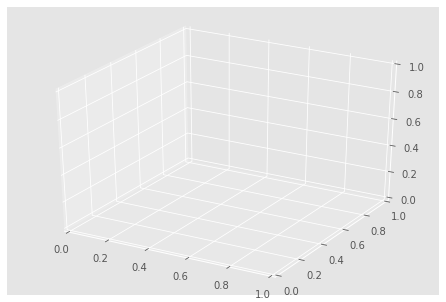

In [59]:
fig = plt.figure()
ax = Axes3D(fig)
mat=[0, 1, 2, 3, 4, 5, 6,7,8,9,10]
asignar=[]
for row in y:
    asignar.append(mat[row])
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=asignar,s=60)

In [15]:
kmeans = KMeans(n_clusters=5).fit(x)
centroids = kmeans.cluster_centers_
print(centroids)

[[2.11351351e+01 7.88121622e+00 5.77027027e+00 9.33783784e+00
  5.09459459e+00 3.13513514e+00 7.52837838e+01 3.66081081e+02]
 [2.30000000e+01 6.80000000e+00 4.00000000e+00 1.20000000e+01
  6.00000000e+00 4.00000000e+00 1.80000000e+02 6.12000000e+03]
 [2.20000000e+01 7.62714286e+00 5.85714286e+00 9.00000000e+00
  4.85714286e+00 3.14285714e+00 7.92857143e+01 2.70285714e+03]
 [2.14563758e+01 7.83751678e+00 5.60402685e+00 8.79798658e+00
  5.04697987e+00 3.67785235e+00 6.43557047e+01 7.66241611e+01]
 [2.08800000e+01 7.93160000e+00 6.04000000e+00 9.84000000e+00
  4.32000000e+00 2.24000000e+00 7.90400000e+01 9.80000000e+02]]


ValueError: 'c' argument has 11 elements, which is not acceptable for use with 'x' with size 5, 'y' with size 5.

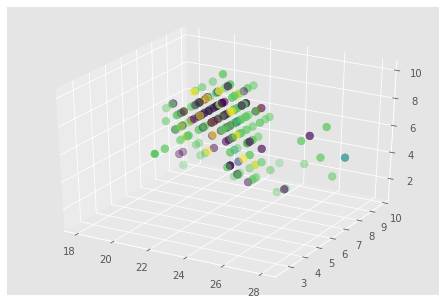

In [33]:
#prediciendo
labels = kmeans.predict(x)
# Getting the cluster centers
C = kmeans.cluster_centers_
mat=[0, 1, 2, 3, 4, 5, 6,7,8,9,10]
asignar=[]
for row in labels:
    asignar.append(mat[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=mat, s=1000)

ValueError: 'c' argument has 11 elements, which is not acceptable for use with 'x' with size 5, 'y' with size 5.

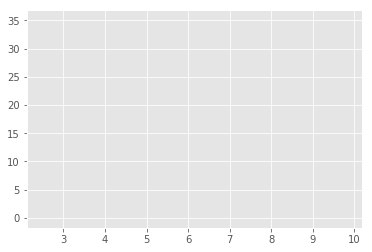

In [62]:
# Getting the values and plotting it
f1 = df['Promedio Actual'].values
f2 = df['¿Cuántos exámenes extraordinarios has presentado?'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=mat, s=1000)
plt.show()